Andre Londono
Dis 102
SID 3032171715

# Homework 6: Numerical Differentiation, Integration, ODEs

##### ** Submit this notebook to bCourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_HW07.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Numerical integration [Ayars 2.2]

Compare results of the trapezoid integration method,  Simpson’s method, and the adaptive Gaussian quadrature method for the following integrals:

1. $$\int_0^{\pi/2}\cos x\, dx $$
1. $$\int_1^3 \frac{1}{x^2}\, dx $$
1. $$\int_2^4 (x^2+x+1)\, dx$$
1. $$\int_0^{6.9}\cos\left(\frac{\pi}{2}x^2\right)\, dx$$

For each part, try it with more and with fewer slices to determine how many slices are required to give an ‘acceptable’ answer. (If you double the number of slices and still get the same answer, then try half as many, etc.) Parts (3) and (4) are particularly interesting in this regard. In your submitted work, describe roughly how many points were required, and explain.

In [88]:
from scipy import integrate
from scipy.integrate import quad, quadrature, fixed_quad
import scipy
import numpy as np

#1


x1 = np.linspace(0, np.pi/2, 1000)
y1 = np.cos(x1)
t1 = scipy.integrate.cumtrapz(y1, x1, initial = 0)
print "#1", "\n",  "Trapezoid: ", t1[t1.size-1]

print "Simpsons Method", scipy.integrate.simps(y1, x1)
f1 = lambda x : np.cos(x)
print "Quadrature method", scipy.integrate.quad(f1, 0, np.pi/2.)

#2
x2 = np.linspace(1, 3, 1000)
y2 = 1/x2**2
t2= scipy.integrate.cumtrapz(y2, x2, initial = 0)
print "#2", "\n",  "Trapezoid: ", t2[t2.size-1]

print "Simpsons Method: ", scipy.integrate.simps(y2, x2)
f2 = lambda x2 : 1/(x2**2)
print "Quadrature method: ", scipy.integrate.quad(f2, 1, 3)

#3
x3 = np.linspace(2 ,4, 1000)
y3 = x3**2+x3+1
t3= scipy.integrate.cumtrapz(y3, x3, initial = 0)
print "#3", "\n",  "Trapezoid: ", t3[t3.size-1]

print "Simpsons Method: ", scipy.integrate.simps(y3, x3)
f3 = lambda x3 : x3**2+x3+1
print "Quadrature method: ", scipy.integrate.quad(f3, 2, 4)


#4
x4 = np.linspace(0 , 6.9, 1000)
y4 = np.cos(np.pi/2 * x4**2)
t4= scipy.integrate.cumtrapz(y4, x4, initial = 0)
print "#4", "\n",  "Trapezoid: ", t4[t4.size-1]

print "Simpsons Method: ", scipy.integrate.simps(y4, x4)
f4 = lambda x4 : np.cos(np.pi/2 * x4**2)
print "Quadrature method: ", scipy.integrate.quad(f4, 0, 6.9)

print "\n", '1000 points were required in order to get the accuracy'



#1 
Trapezoid:  0.999999793971
Simpsons Method 0.999999999838
Quadrature method (0.9999999999999999, 1.1102230246251564e-14)
#2 
Trapezoid:  0.666667309927
Simpsons Method:  0.666666668692
Quadrature method:  (0.6666666666666667, 2.9064751454420587e-12)
#3 
Trapezoid:  26.6666680027
Simpsons Method:  26.666666668
Quadrature method:  (26.666666666666664, 2.9605947323337506e-13)
#4 
Trapezoid:  0.473274884895
Simpsons Method:  0.473220279949
Quadrature method:  (0.47322531435151366, 1.9407000854685105e-10)

1000 points were required in order to get the accuracy


## Problem 2: Numerical differentiation [Ayars 2.8]

Write a function that, given a list of abscissa values $x_i$ and function values $f_i(x_i)$, returns a list of values of the second derivative $f''(x_i)$ of the function. Test your function by giving it a list of known function values for $\sin(x)$ and making a graph of the differences between the output of the function and $−\sin(x)$. Compare your output to Python's *scipy.misc.derivative*


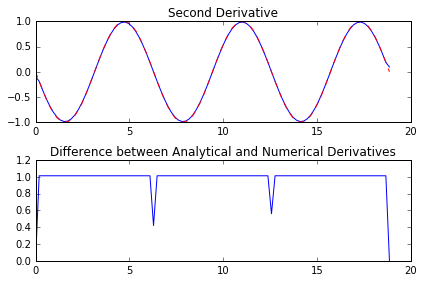

In [28]:
import numpy as np
import matplotlib.pylab as plt
from pylab import*
%matplotlib inline

x1 = np.linspace(0, 6*pi, 100)
y1 = np.sin(x1)

def deriv2(x, y):
    dyc = [0.0]*len(x)
    dyc[0] = (y[0] - y[1])/(x[0] - x[1])
    for i in range(1,len(y)-1):
        dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
        dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

    dyc2 = [0.0]*len(x)
    dyc2[0] = (dyc[0] - dyc[1])/(x[0] - x[1])
    for i in range(1,len(dyc)-1):
        dyc2[i] = (dyc[i+1] - dyc[i-1])/(x[i+1]-x[i-1])
        dyc2[-1] = (dyc[-1] - dyc[-2])/(x[-1] - x[-2])
    return dyc2


plt.subplot(2,1,1)
plt.title('Second Derivative')
plt.plot(x1, deriv2(x1,y1), label = "Second Derivative Numerical")
plt.plot(x1, -np.sin(x1), 'r--', label = "Second Derivative Analytical")
plt.tight_layout()
plt.subplot(2,1,2)
plt.title('Difference between Analytical and Numerical Derivatives')
plt.plot(x1, -np.sin(x1)/deriv2(x1,y1))
plt.tight_layout()


plt.show()


## Problem 3: MC integration [similar to Ayars 6.2]

The “volume” of a 2-sphere $x^2 + y^2 \le r^2$ (a.k.a. a “circle”) is $(1)\pi r^2$. The volume of a 3-sphere $x^2 + y^2 + z^2 \le r^2$ is $4/3 \pi r^3$. The equation for an N-sphere is $x_1^2 +x_2^2 +x_3^2 + ... + x_N^2 \le r^2$ (where $x_i$ are spatial coordinates in $N$ dimensions). We can guess, by induction from the 2-dimensional and 3-dimensional cases, that the “volume” of an N-sphere is $\alpha_N\pi r^N$. Write a function that uses Monte Carlo integration to estimate $\alpha_N$ and its uncertainty for a fixed $N$. Graph $\alpha_N$ with its uncertainty as a function of $N$ for $N=4..10$. 

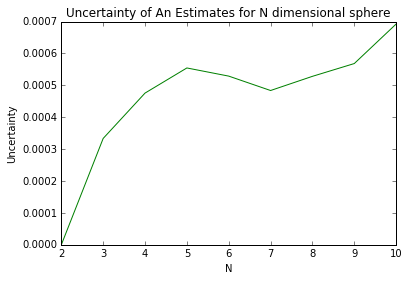

In [90]:
from __future__ import division
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import random
%matplotlib inline

random.seed()

def listSum(alist):
    sum1 = 0
    for i in alist:
        sum1 += i
    return sum1


def estimateAn(n):
    #Need to calculate An term for dimensions 4-10
    throws = 0
    hits = 0
    Asq = 2**n
    Xi = []
    
    for i in range(1000):
        Xi = []
        for t in range(0, n):
            Xi.append(np.random.uniform(-1,1)**2  )     
        if(listSum(Xi)<=1):
            hits = hits +1
        #print Xi
        throws+=1
        #print listSum(Xi)
    #print hits
    #print throws
    return Asq*(hits/throws)/ np.pi


an = []
uncertainty = []

for d in range(2,11):
    an.append(estimateAn(d))
    uncertainty.append(sp.std(an)/(1000**1/2))
    

            
plt.title("Uncertainty of An Estimates for N dimensional sphere")
x = range(2,11)
plt.plot(x, np.asarray(uncertainty), 'g')
plt.xlabel("N")
plt.ylabel("Uncertainty")

#uncertainty = std dev/ rootn

plt.show()
    
            
    

## Problem 4: Driven-Damped Harmonic Oscillator

The governing ODEs for a driven damped harmonic oscillator are:

$$\frac{d\omega}{dt} = - \frac{g}{L} \sin\theta - \beta \frac{d\theta}{dt} + A_D \sin\Omega_D t   $$ 
$$\frac{d\theta}{dt} = \omega  $$

where $A_D$ is the amplitude of the driving torque, $\Omega_D$ is the angular frequency of the driving force and $\beta$ is the damping coefficient. The driving force appears as a positive term since it acts against the restoring force provided by the weight of the bob.

Use Runge-Kutta algorithm to find the numerical solution for angular position and angular velocity of a driven-dapmed harmonic oscillaor given $dt$ = 0.04 s, $\Theta_0$ = 0.1$\pi$ radians, $\omega_0$ = 0.0 radians/s, m = 1.0 kg, L = 1.0 m, $\beta$ = 0.5, $A_D$ = 0.8 N.m, $\Omega_D$ = 0.5 radians/s, and g = 9.8 $m/s^2$. Calculate the kinetic, potential, and total energies as a function of time. How is the total energy behaving with time? (Hint: To test your solution, first sent $A_D=0$. You should get a solution for a damped oscillator.)

Kinetic energy and potential energy should be alternating and decreasing over time due to resistance 


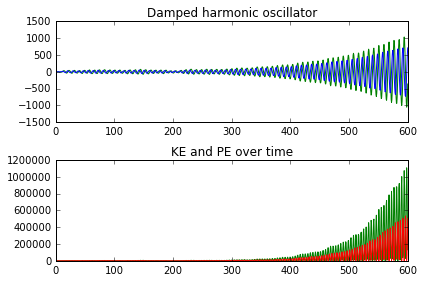

In [99]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#f(x,t) = [xdot, ydot]
#[x , y] = [x,y] +deltat*f(x,t)

#def coupleDiff(omega, theta):
    #wdot = -g/L*np.sin(theta)-beta*omega+Ad*np.sin(omegaD)
    #thetadot = omega
    #return wdot, thetadot
    
#plot omega squared

    
dt = .04
m = 1 
L=1
beta = .5    #Damping coefficient
Ad = .8      #Driving torque
omegaD=1  #Angular frequency
omega0=0
g = 9.8


initial_state = array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
N = 1000
tau = 600
dt = tau/float(N-1)
wanted_times = linspace(0, tau, N)
    
def DHO(state, time):
    g0 = state[1]
    g1 = -g/L*np.sin(state[1])-beta*state[0]+Ad*np.sin(omegaD*time)
    return array([g0,g1])


def rk2(y, time, dt, derivs): 
    k0 = dt*derivs(y, time)
    k1 = dt*derivs(y+k0, time+dt) 
    y_next = y+0.5*(k0+k1)
    return y_next


answerRK = zeros([N,2])
answerRK[0,:] = initial_state
for j in range (N-1):
    answerRK[j+1] = rk2(answerRK[j], 0, dt , DHO)


wRK = answerRK[:,0]
oRK = answerRK[:,1]
plt.subplot(2,1,1)
plt.title("Damped harmonic oscillator")
plt.plot(wanted_times, wRK, 'g-')
plt.plot(wanted_times, oRK, 'b')
plt.tight_layout()

plt.subplot(2,1,2)
plt.title("KE and PE over time")
plt.plot(wanted_times,wRK**2, 'g')
plt.plot(wanted_times, oRK**2, 'r')
plt.tight_layout()


plt.show()